## 1. Objective

This project is part of my current data analysis work for AIDispatcher, Inc., a trucking company. The goal is to figure out how driver performance is related to things like fuel efficiency, total miles driven, gross earnings, workdays, and overall performance scores. Using real operational data, we'll apply statistical techniques to find key relationships between these factors. The results will help us uncover patterns that can inform decision-making, make operations more efficient, and improve how we evaluate driver performance.

##  2. Getting the Data

I receive raw data containing key performance metrics of our drivers every week. This data is cleaned and then aggregated into longer periods, such as months, quarters, or years, for further processing and analysis. This project will analyze an aggregated dataset.

## 3. Import the Liabraries

The first step is to import the data for analysis. This requires importing the necessary libraries, including pandas, seaborn, numpy, and matplotlib.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In Jupyter Notebooks, we use the magic command `%matplotlib inline` to display Matplotlib interactive plots directly within the notebook. This command is not necessary for standalone Python scripts, where `plt.show()` should be used instead.

## 4. Read the Data

Then, we read the data from a CSV file named`driver_ID_performance.csv` into a data frame using pandas.

In [11]:
# Now we need to read the data
df = pd.read_csv(r'/Users/serorl/Downloads/_AIDispatcher/Company Statement/3_EDAnalysis/_INPUT/DRIVERS_with_ID/driver_ID_performance.csv')

Finally, we display the first five rows of the data frame to verify that the data has been read correctly. 

In [13]:
# Now let's take a look at the data

df.head()

,Driver ID,Avg Gross,Total Gross,Avg Profit/Loss,Total Profit/Loss,Avg Miles,Total Miles,Avg Work Days,Total Work Days,Avg Fuel Efficiency,Avg Driver Pay,Total Driver Pay,Performance Score,Performance Rank
0,driver_001,8546.250,34185.0,1708.1225,6832.49,3324.975,13299.90,6.50,26,0.4950,2327.4825,9309.93,3.084045,1
1,driver_002,5940.000,11880.0,656.1350,1312.27,2207.500,4415.00,5.00,10,0.5750,1545.2500,3090.50,2.988057,2
2,driver_003,9509.375,38037.5,1538.9650,6155.86,3796.250,15185.00,6.75,27,0.5425,2657.3750,10629.50,2.910330,3
3,driver_004,8200.000,8200.0,1641.5300,1641.53,3475.000,3475.00,6.00,6,0.3800,2432.5000,2432.50,2.832095,4
4,driver_005,6900.000,6900.0,923.6700,923.67,2923.960,2923.96,5.00,5,0.5300,1900.5700,1900.57,2.675710,5


## 5. Inspecting and Cleaning the Data

The next step is to clean and format the data if needed.

The function `df.info()` is used to display a summary of a DataFrame in Pandas. Its purpose is:

- **Check DataFrame Structure** – Shows the number of rows and columns.  
- **Identify Data Types** – Displays the data type (`int64`, `float64`, `object`, etc.) for each column.  
- **Detect Missing Values** – Indicates how many non-null values each column has.  
- **Assess Memory Usage** – Helps understand the dataset’s memory consumption.  


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Driver ID            51 non-null     object 
 1   Avg Gross            51 non-null     float64
 2   Total Gross          51 non-null     float64
 3   Avg Profit/Loss      51 non-null     float64
 4   Total Profit/Loss    51 non-null     float64
 5   Avg Miles            51 non-null     float64
 6   Total Miles          51 non-null     float64
 7   Avg Work Days        51 non-null     float64
 8   Total Work Days      51 non-null     int64  
 9   Avg Fuel Efficiency  51 non-null     float64
 10  Avg Driver Pay       51 non-null     float64
 11  Total Driver Pay     51 non-null     float64
 12  Performance Score    51 non-null     float64
 13  Performance Rank     51 non-null     int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 5.7+ KB
None


Here is another way to identify any **missing data** if we need just that.

To do this, a `for` loop is used. This loop iterates through each column of the DataFrame, calculating the percentage of missing values by utilizing NumPy's `np.mean()` and `isnull()` functions. The output, which displays the column name and corresponding percentage of missing data, is then printed and formatted. In the output below, the analysis reveals that all values are present, and there is no missing data.

In [20]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Driver ID - 0%
Avg Gross - 0%
Total Gross - 0%
Avg Profit/Loss - 0%
Total Profit/Loss - 0%
Avg Miles - 0%
Total Miles - 0%
Avg Work Days - 0%
Total Work Days - 0%
Avg Fuel Efficiency - 0%
Avg Driver Pay - 0%
Total Driver Pay - 0%
Performance Score - 0%
Performance Rank - 0%


### --> Check for non-numeric values in numerical columns

In [22]:
numerical_cols = ['Avg Gross', 'Total Gross', 'Avg Profit/Loss', 'Total Profit/Loss', 'Avg Fuel Efficiency', 
                        'Avg Miles', 'Total Miles', 'Avg Work Days', 'Performance Score']
non_num = df[numerical_cols].map(lambda x: isinstance(x, (int, float))).all()
print('=== Numerical Values in Numerical Columns:')
print(non_num)

=== Numerical Values in Numerical Columns:
Avg Gross              True
Total Gross            True
Avg Profit/Loss        True
Total Profit/Loss      True
Avg Fuel Efficiency    True
Avg Miles              True
Total Miles            True
Avg Work Days          True
Performance Score      True
dtype: bool


### --> Check for Duplicates

We will quickly check for any duplicates and remove them to ensure there are none.

In [25]:
duplicates = df[df.duplicated()]
print(f"Duplicates dropped: {duplicates.shape[0]}")
print(duplicates)  # Display the dropped duplicate rows


Duplicates dropped: 0
Empty DataFrame
Columns: [Driver ID, Avg Gross, Total Gross, Avg Profit/Loss, Total Profit/Loss, Avg Miles, Total Miles, Avg Work Days, Total Work Days, Avg Fuel Efficiency, Avg Driver Pay, Total Driver Pay, Performance Score, Performance Rank]
Index: []


## 6. Exploratory Data Analysis

### 6.1 Are there any Outliers? (Univariate Analysis)

Now, we can examine the distribution of each performance metric by generating box plots.

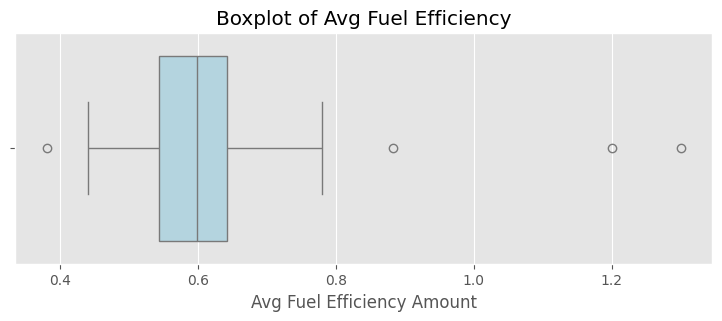

In [29]:
# Create a box plot for 'Avg Fuel Efficiency'
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Avg Fuel Efficiency'], color='lightblue')  # Creating a boxplot to identify outliers in Avg Fuel Efficiency
plt.title('Boxplot of Avg Fuel Efficiency')
plt.xlabel('Avg Fuel Efficiency Amount')
plt.show()

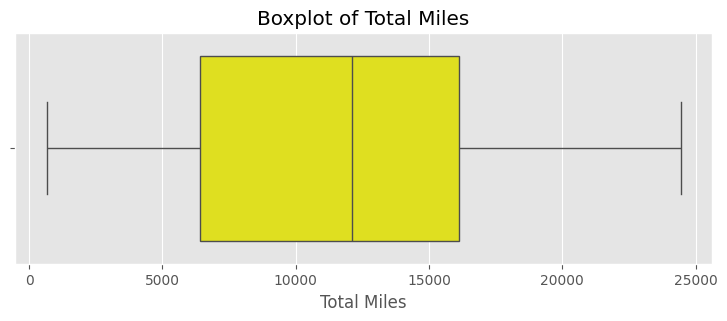

In [30]:
# Create a box plot for 'Total Miles'
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Total Miles'], color='yellow')  # Creating a boxplot to identify outliers in Total Miles
plt.title('Boxplot of Total Miles')
plt.xlabel('Total Miles')
plt.show()

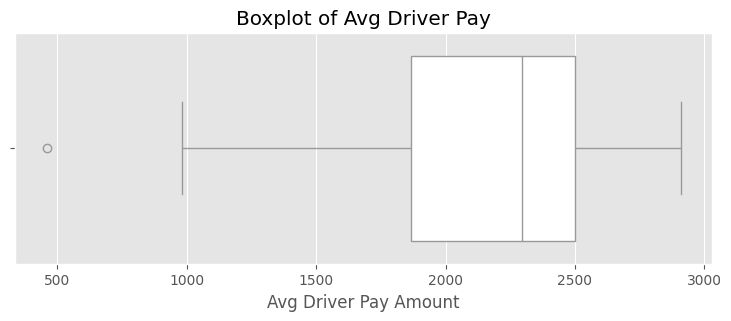

In [31]:
# Create a box plot for 'Avg Driver Pay'
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Avg Driver Pay'], color='white')  # Creating a boxplot to identify outliers in Avg Profit/Loss
plt.title('Boxplot of Avg Driver Pay')
plt.xlabel('Avg Driver Pay Amount')
plt.show()

#### Boxplot of Avg Profit/Loss

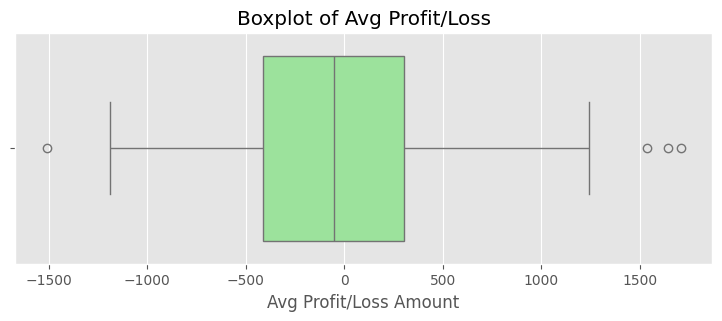

In [33]:
plt.figure(figsize=(9, 3))
sns.boxplot(x=df['Avg Profit/Loss'], color='lightgreen')  # Creating a boxplot to identify outliers in Avg Profit/Loss
plt.title('Boxplot of Avg Profit/Loss')
plt.xlabel('Avg Profit/Loss Amount')
plt.show()

#### Multiple Boxplots

Alternatively, a **single Python script** can generate box plots with informative labels for better visualization and inspection of all the numerical columns.

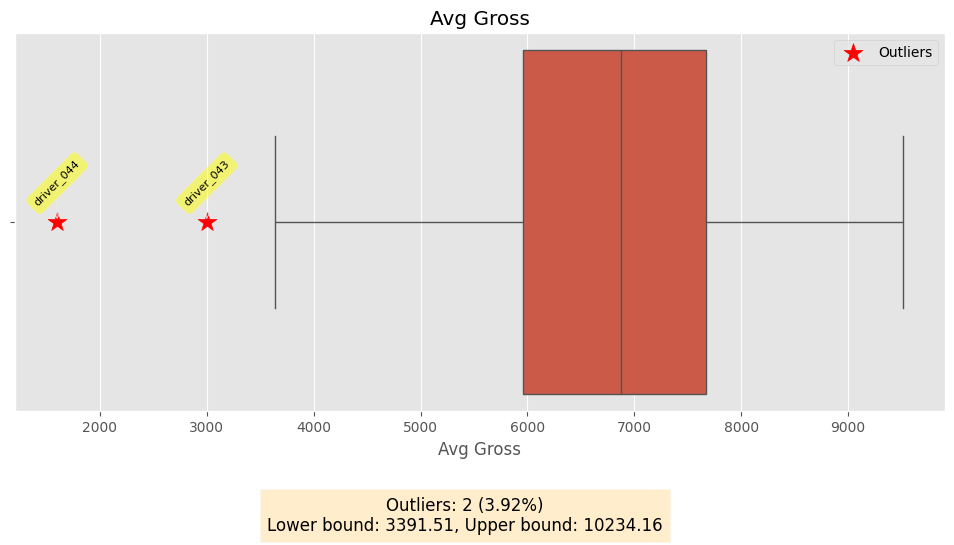

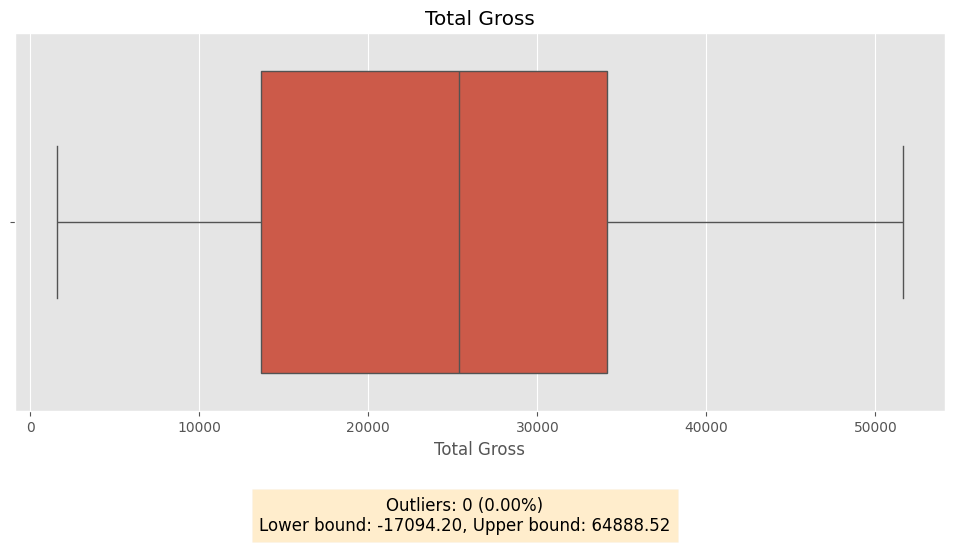

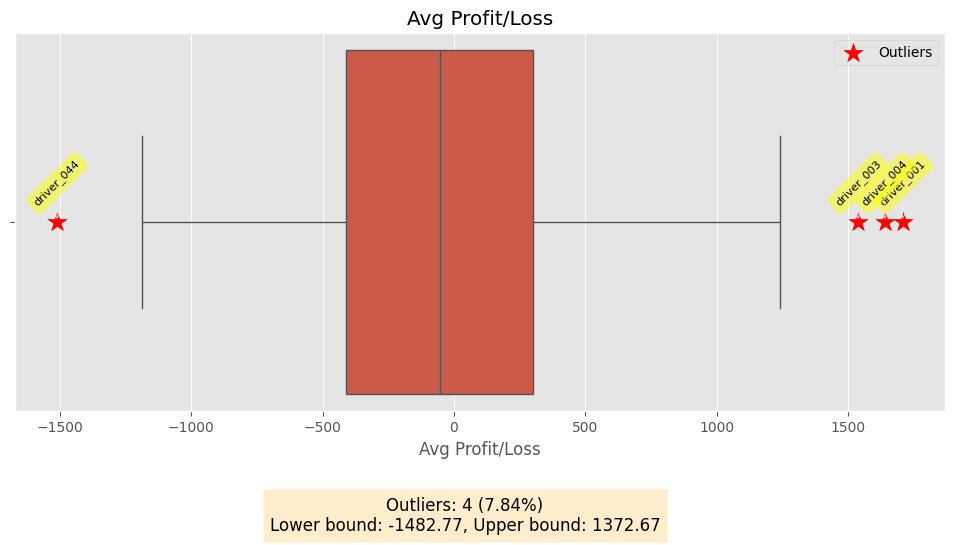

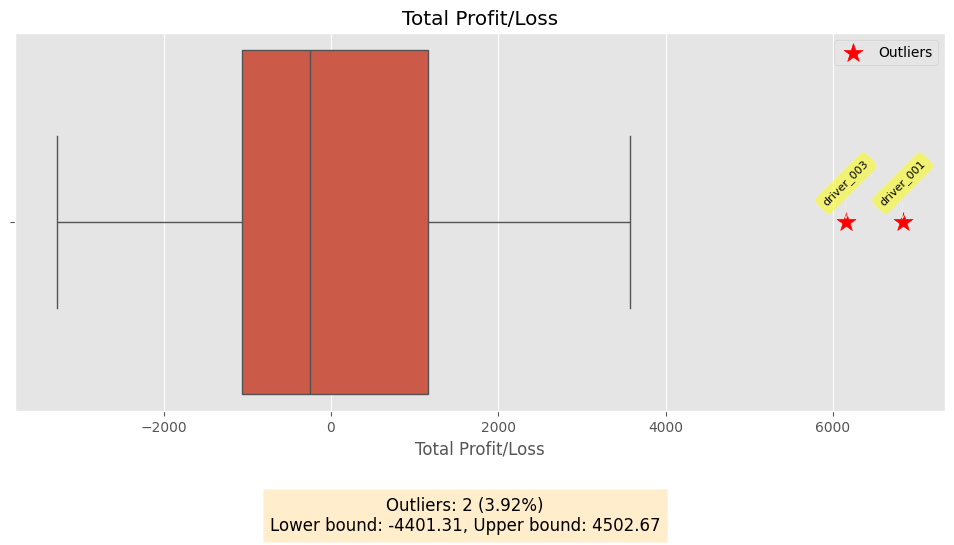

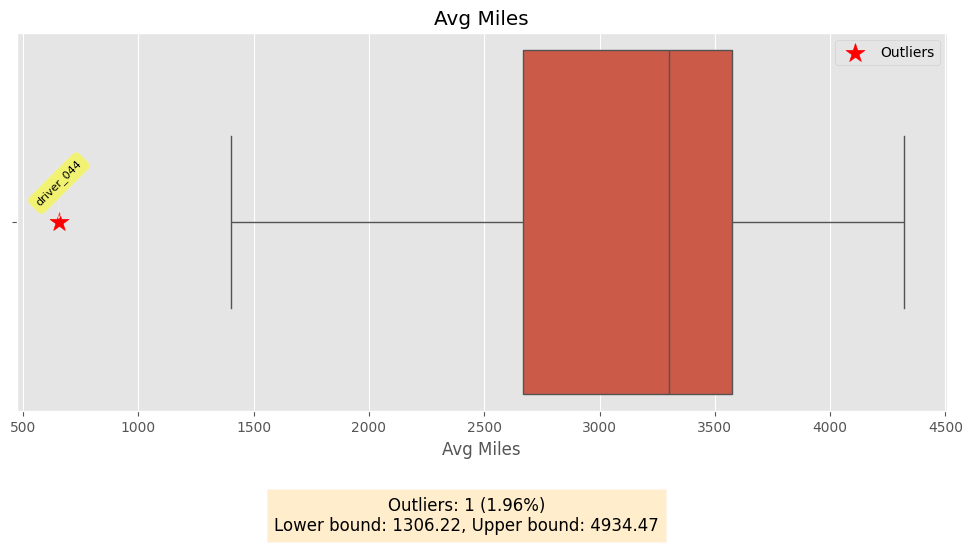

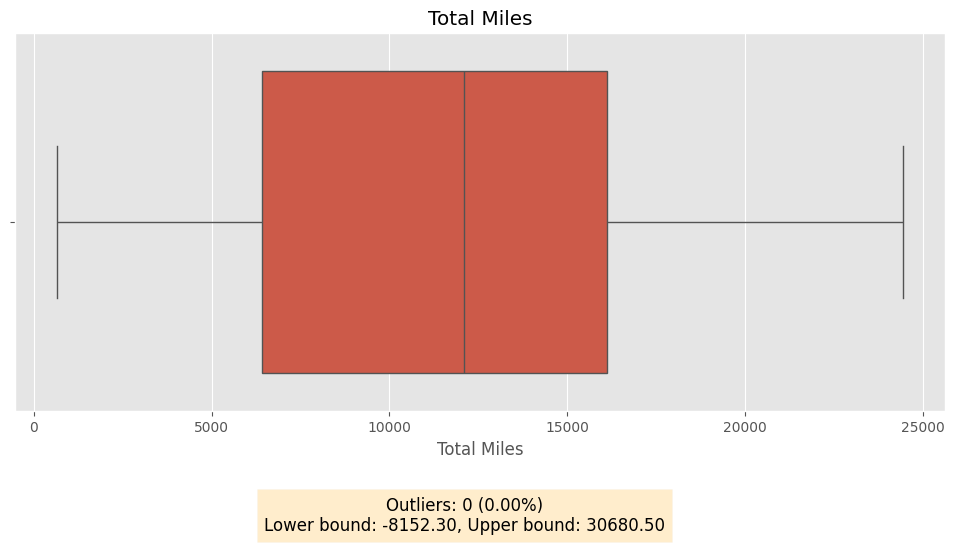

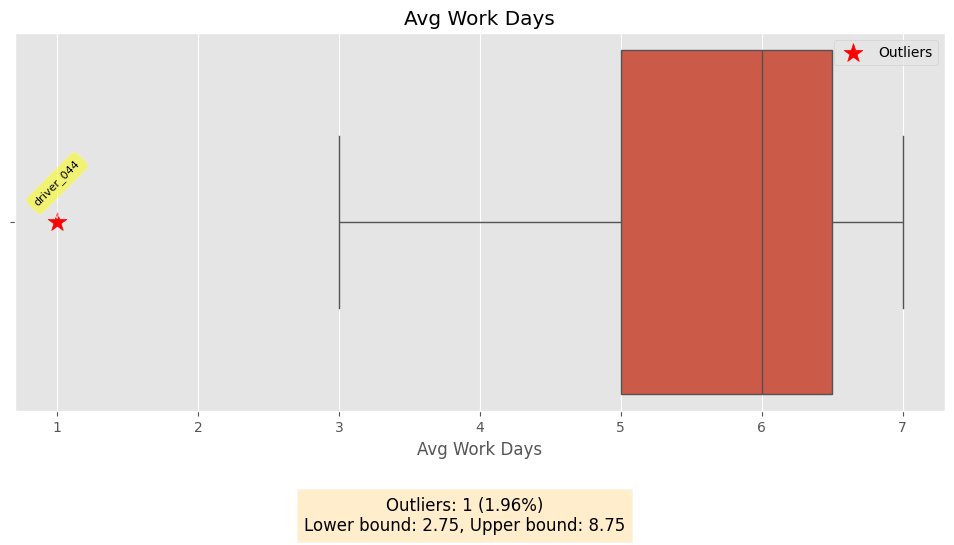

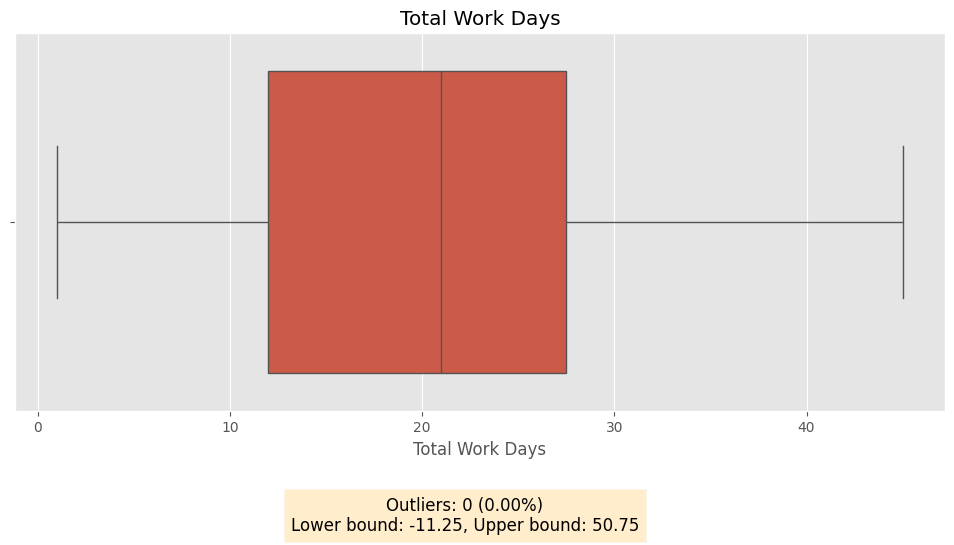

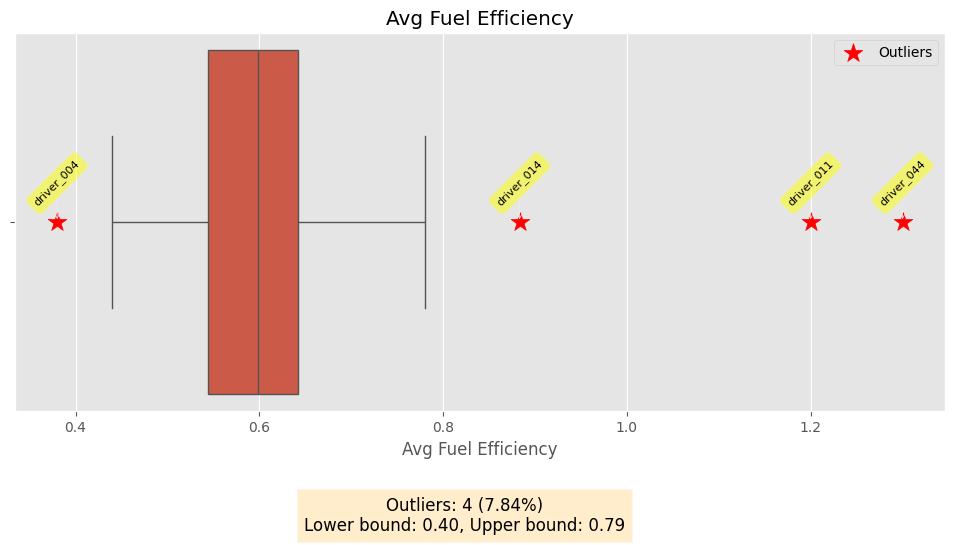

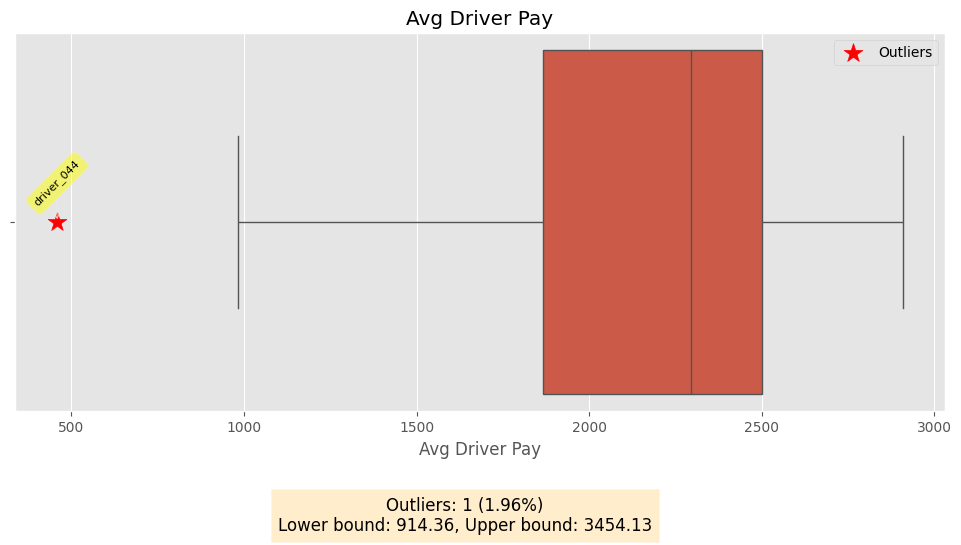

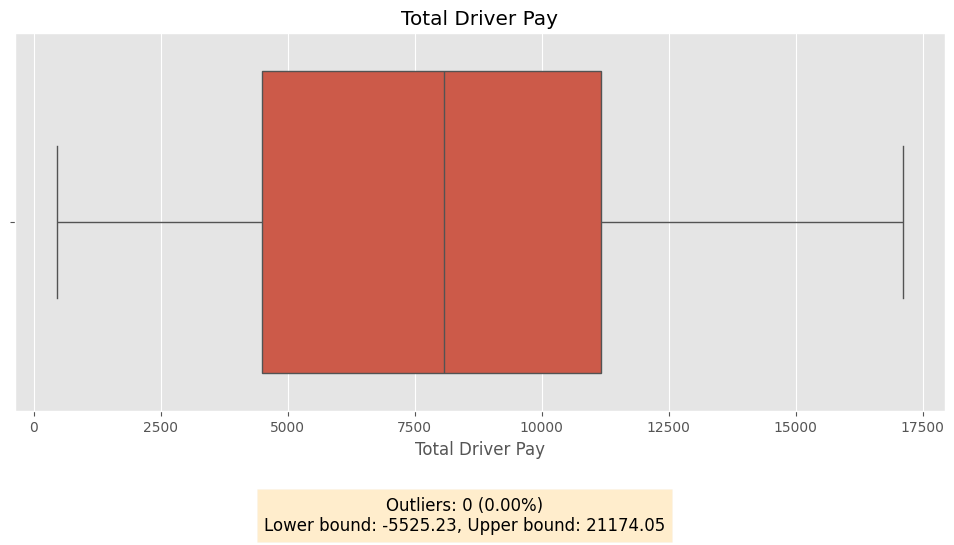

Outlier analysis completed. Boxplots saved.


In [35]:

def plot_outliers(df, numerical_cols):
    """
    Plot boxplots for each numerical column to identify outliers

    Parameters:
    df (pandas.DataFrame): The data frame containing the data
    numerical_cols (list): List of numerical column names
    """
    # Loop through each numerical column
    for column in numerical_cols:
        if column not in ["Performance Score", "Performance Rank"]:
            plt.figure(figsize=(12, 6))

            # Create subplot
            ax = plt.subplot(1, 1, 1)

            # Create a boxplot without outliers (we'll add them as stars)
            sns.boxplot(x=df[column], ax=ax, fliersize=0)  # fliersize=0 hides default outliers


            # Set title and labels
            plt.title(column)
            plt.xlabel(column)

            # Calculate quartiles and IQR for the column
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Identify outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            num_outliers = len(outliers)

            # Plot outliers as red stars
            if num_outliers > 0:
                # Get outlier indices for labeling

                outlier_values = outliers[column].tolist()

                # Plot each outlier as a red star
                ax.scatter([val for val in outlier_values],
                           [0] * len(outlier_values),  # Y-position at 0 for all points
                           color='red',
                           marker='*',
                           s=200,  # Size of stars
                           zorder=3,  # Ensure they're on top of the boxplot
                           label='Outliers')

            # Add labels for each outlier point
            for idx, row in outliers.iterrows():
                plt.annotate(
                    row['Driver ID'],
                    xy=(row[column], 0),
                    xytext=(0, 10),  # 10 points vertical offset
                    textcoords='offset points',
                    ha='center',  # horizontal alignment
                    va='bottom',  # vertical alignment
                    rotation=45,
                    fontsize=8,
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
                )

            if num_outliers > 0:
                plt.legend()

            # =====================================
            # Adjust the figure to make room for the text at the bottom
            plt.subplots_adjust(bottom=0.25)  # Increase bottom margin

            # Place text annotation with outlier statistics
            plt.figtext(0.5, 0.05,
                        f"Outliers: {num_outliers} ({num_outliers / len(df) * 100:.2f}%)\n"
                        f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}",
                        ha="center", fontsize=12, bbox={"facecolor": "orange", "alpha": 0.2, "pad": 5})


            # Save figure - make sure to use a valid filename
            safe_column_name = str(column).lower().replace("/", "_").replace(" ", "_")
            # plt.savefig(f'boxplot_{safe_column_name}.png', bbox_inches='tight')

            plt.show()
            
            plt.close()  # Close the figure to free memory



if __name__ == "__main__":
    # Load your data
    df = pd.read_csv('/Users/serorl/Downloads/_AIDispatcher/Company Statement/3_EDAnalysis/_INPUT/DRIVERS_with_ID/driver_ID_performance.csv')

    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Plot outliers
    plot_outliers(df, numerical_cols)

    print("Outlier analysis completed. Boxplots saved.")

### 6.2 What about the Distribution?

### --> Histograms

#### Distribution of Avg Profit/Loss (IQR method)

The distribution of **Avg Profit/Loss** is displayed in this plot as a histogram overlaid with a **kernel density estimate (KDE)**. Outliers are marked with red '**X**'s, and outlier thresholds are shown with dashed red vertical lines.


The **purpose** of this plot is to gain a better understanding of:

- **The overall trend of profits and losses** (e.g., predominantly negative, positive, or balanced).  
- **Data distribution** (normal, skewed, or multimodal).  
- **Data variability or spread**.  
- **The presence of outliers** (extreme losses or gains).  


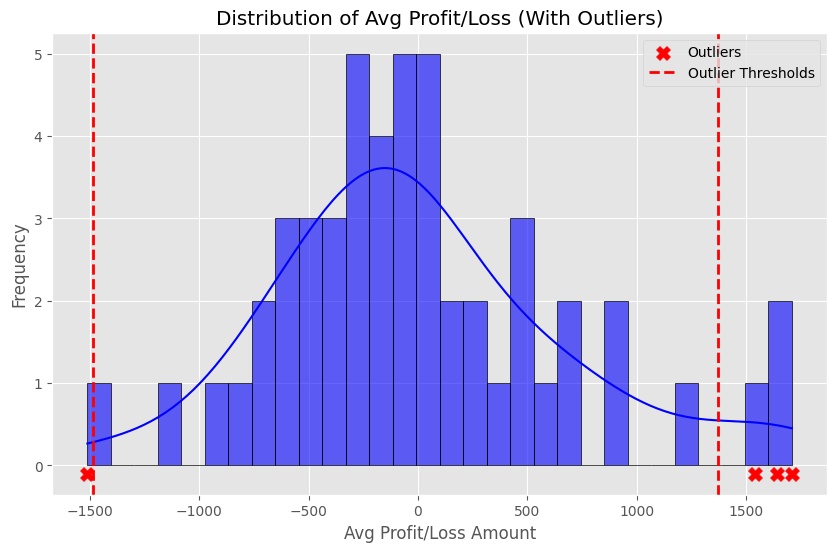

In [40]:

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(df['Avg Profit/Loss'], bins=30, kde=True, color='blue', alpha=0.6, edgecolor='black')

# Calculate IQR (Interquartile Range)
Q1 = np.percentile(df['Avg Profit/Loss'], 25)
Q3 = np.percentile(df['Avg Profit/Loss'], 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Avg Profit/Loss'] < lower_bound) | (df['Avg Profit/Loss'] > upper_bound)]

# Plot outliers as large red 'X' markers
plt.scatter(outliers['Avg Profit/Loss'], np.zeros_like(outliers['Avg Profit/Loss']) - 0.1,
            color='red', marker='X', s=100, label='Outliers', zorder=3)

# Add vertical lines for outlier thresholds
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Outlier Thresholds')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Distribution of Avg Profit/Loss (With Outliers)')
plt.xlabel('Avg Profit/Loss Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.close()

The distribution of data is asymmetrical, with a longer tail on the right, which suggests it may be right-skewed. The central peak around 0 indicates that most observations are close to breaking even. The presence of both negative (losses) and positive (profits) values shows the variability in financial performance.

#### Distribution of Avg Fuel Efficiency (the standard deviation (σ) rule)

Alternatively, the modified script calculates outliers using the **standard deviation (σ) rule** instead of the IQR method. Typically, data points beyond **±3 standard deviations** from the mean are considered outliers.

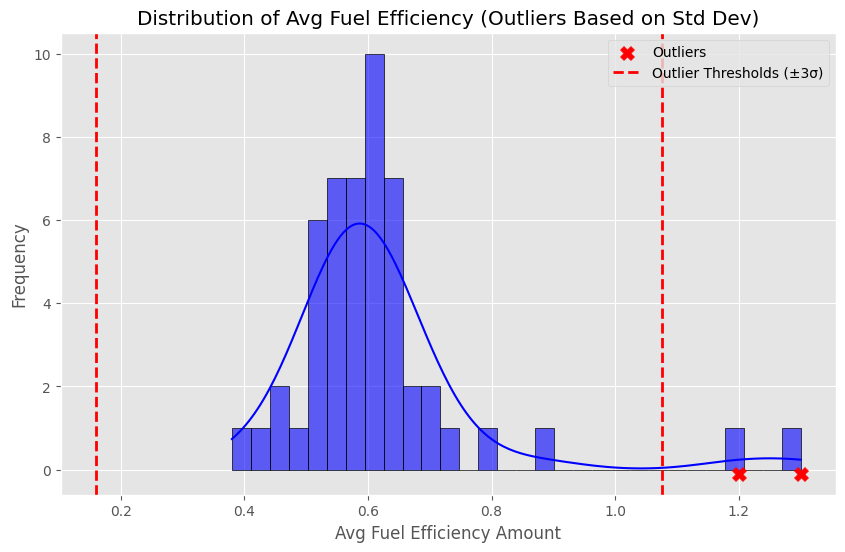

In [44]:

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(df['Avg Fuel Efficiency'], bins=30, kde=True, color='blue', alpha=0.6, edgecolor='black')

# Calculate mean and standard deviation
mean = np.mean(df['Avg Fuel Efficiency'])
std_dev = np.std(df['Avg Fuel Efficiency'])

# Define outlier thresholds (beyond ±3 standard deviations)
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Identify outliers
outliers = df[(df['Avg Fuel Efficiency'] < lower_bound) | (df['Avg Fuel Efficiency'] > upper_bound)]

# Plot outliers as large red 'X' markers
plt.scatter(outliers['Avg Fuel Efficiency'], np.zeros_like(outliers['Avg Fuel Efficiency']) - 0.1,
            color='red', marker='X', s=100, label='Outliers', zorder=3)

# Add vertical lines for ±3 standard deviation thresholds
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Outlier Thresholds (±3σ)')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Distribution of Avg Fuel Efficiency (Outliers Based on Std Dev)')
plt.xlabel('Avg Fuel Efficiency Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()
plt.close()

The distribution is **right-skewed**, with the majority of values clustered around 0.6. Values exceeding 1.2 are identified as outliers. This visualization is used to detect abnormal fuel efficiency, which could be attributed to measurement errors, atypical driving conditions, or exceptional vehicle performance.

## 7. Correlation Analysis (Bivariate Analysis)

The project's focus will move from traditional data analysis methods (e.g., grouping with pandas) to analyzing correlations between different factors. For example, there's likely a strong correlation between miles driven and gross revenue. The goal is to find correlations between various factors and profit/loss amounts to better understand the influences of financial success in the trucking business.

### Correlation Matrix for Numeric Features

The correlation matrix identifies **relationships** between variables and pinpoints key performance drivers by determining the Pearson correlation coefficients between the numerical features in a dataset. This is helpful for finding strong positive or negative correlations and exploring the **impact** of one metric on another (e.g., does Avg Fuel Efficiency impact Total Profit/Loss, or is Performance Score correlated with Miles Driven?).

In [50]:
correlation_cols = ['Avg Gross', 'Total Gross', 'Avg Profit/Loss', 'Total Profit/Loss', 'Avg Miles', 'Total Miles', 'Avg Fuel Efficiency', 
                    'Avg Work Days', 'Performance Score']
correlation_matrix = df[correlation_cols].corr()   # Calculate the correlation matrix
print('===== Pearson Correlation Matrix ======')
print(correlation_matrix)

===== Pearson Correlation Matrix ======
                     Avg Gross  Total Gross  Avg Profit/Loss  \
Avg Gross             1.000000     0.616521         0.725056   
Total Gross           0.616521     1.000000         0.297192   
Avg Profit/Loss       0.725056     0.297192         1.000000   
Total Profit/Loss     0.594315     0.328678         0.884408   
Avg Miles             0.932757     0.603281         0.477656   
Total Miles           0.597165     0.988112         0.213137   
Avg Fuel Efficiency  -0.624331    -0.281490        -0.500116   
Avg Work Days         0.887631     0.601266         0.485861   
Performance Score     0.602189     0.255233         0.862633   

                     Total Profit/Loss  Avg Miles  Total Miles  \
Avg Gross                     0.594315   0.932757     0.597165   
Total Gross                   0.328678   0.603281     0.988112   
Avg Profit/Loss               0.884408   0.477656     0.213137   
Total Profit/Loss             1.000000   0.347436     0

#### Heatmap of the correlation matrix

A correlation matrix heatmap visually represents correlations between numerical variables using colors.
Its purpose is to simplify interpretation and reveal patterns.
Compared to raw values, colors quickly highlight strong or weak relationships and potential redundancies or insights from negative correlations.
The heatmap allows immediate identification of impactful features.

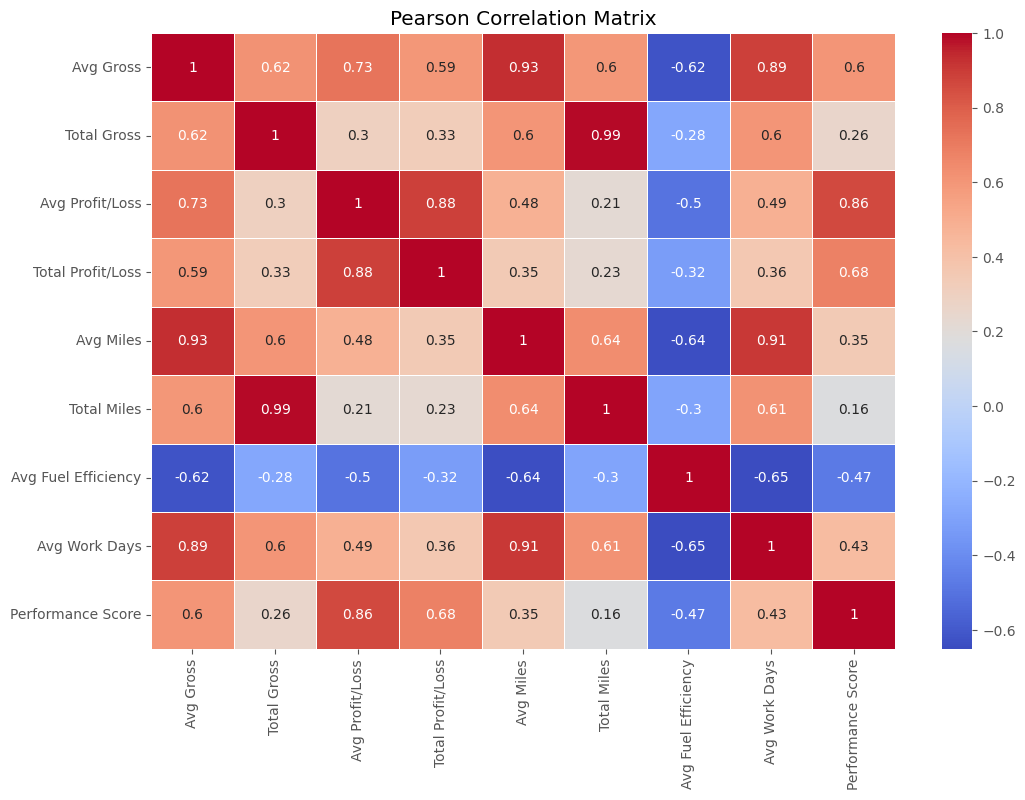

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Heatmap of the correlation matrix
plt.title('Pearson Correlation Matrix')
plt.show()

## Key Insights:

### Strong Positive Correlations

- **Total Gross & Total Miles (0.99)**: Near-perfect correlation indicating that distance traveled directly drives revenue generation—more miles consistently translate to higher gross earnings.

- **Average Gross & Average Miles (0.93)**: Demonstrates that per-trip distance is a primary determinant of average revenue performance.

- **Average Work Days & Average Miles (0.91)**: Operators who work more days accumulate significantly more mileage, creating a direct pathway to increased revenue.

- **Average Gross & Average Work Days (0.89)**: Confirms that time invested in operations reliably translates to higher average earnings.

- **Average Profit/Loss & Performance Score (0.86)**: Performance evaluation strongly emphasizes profitability over other metrics, highlighting the organization's focus on bottom-line results.

### Notable Negative Correlations

- **Average Fuel Efficiency & Average Work Days (-0.65)**: Extended operational periods appear to reduce fuel efficiency, suggesting potential driver fatigue or operational patterns that sacrifice efficiency for coverage.

- **Average Fuel Efficiency & Average Miles (-0.64)**: The inverse relationship between distance and fuel efficiency points to diminishing returns in fuel performance as mileage increases.

- **Average Fuel Efficiency & Average Gross (-0.62)**: Higher revenue generation correlates with lower fuel efficiency, revealing a critical operational trade-off.

### Strategic Business Implications

The correlation matrix reveals a transportation business model where revenue optimization currently depends on maximizing both operational days and miles driven. However, this approach creates tension with sustainability metrics, as shown by negative correlations with fuel efficiency.

Performance evaluation is calibrated to reward profitability (0.86 correlation with performance score) rather than raw revenue generation (0.26 correlation between Total Gross and Performance Score), suggesting management values operational efficiency over volume alone.

### Recommendations

This data indicates opportunities to develop operational strategies that better balance revenue generation with fuel efficiency. Organizations might consider:

1. Optimizing route efficiency rather than simply maximizing mileage
2. Investigating the causes of declining fuel efficiency during extended work periods
3. Revising performance metrics to incentivize sustainable operational practices
4. Exploring the relationship between work patterns and both revenue and efficiency

With the strong correlation between performance scores and profitability, refining operations to maintain profits while improving efficiency could yield substantial long-term benefits.

#### Relationship between Avg Profit/Loss and Avg Miles

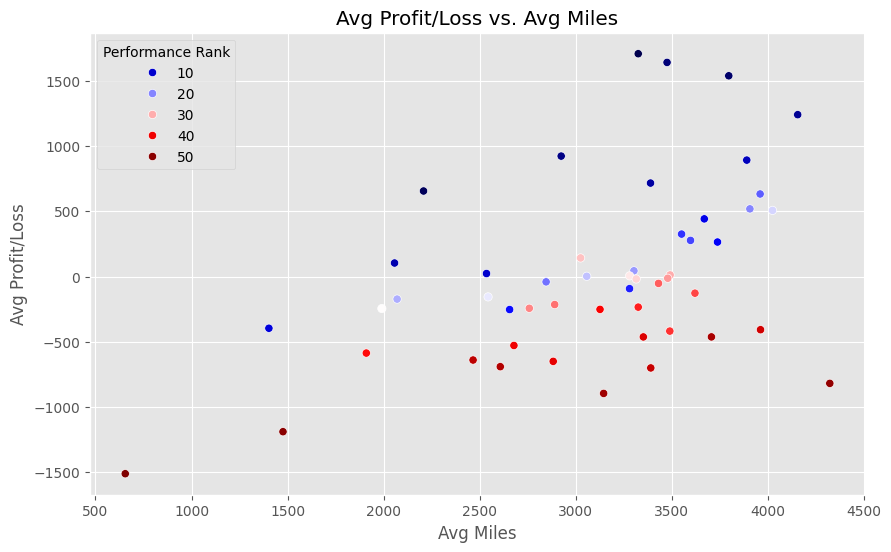

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg Miles', y='Avg Profit/Loss', data=df, hue='Performance Rank', palette='seismic')  # Scatter plot
plt.title('Avg Profit/Loss vs. Avg Miles')
plt.xlabel('Avg Miles')
plt.ylabel('Avg Profit/Loss')
plt.show()

#### Best-Fit Line

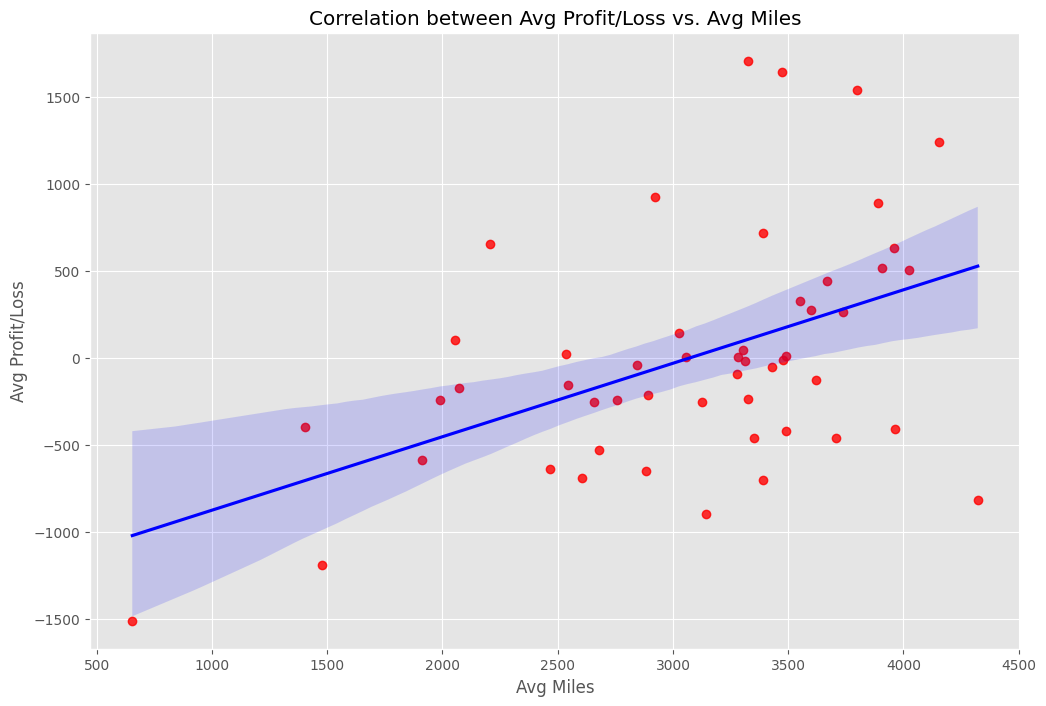

In [58]:
sns.regplot(x="Avg Miles", y="Avg Profit/Loss", data=df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Correlation between Avg Profit/Loss vs. Avg Miles')
plt.xlabel('Avg Miles')
plt.ylabel('Avg Profit/Loss')
plt.show()

***Scatterplot Analysis: Avg Miles vs. Avg Profit/Loss***

* **Positive Correlation:** The scatterplot and upward-sloping trend line show that as average miles driven increases, average profit/loss also increases. 
* **Moderate Correlation and Outliers:** The data points are scattered, indicating a positive but not perfect correlation. This suggests that other factors may influence profit/loss. Some outliers require further investigation to understand their deviation from the general trend.

**Confidence Interval:**

* The shaded blue area around the regression line represents the confidence interval. It indicates the range within which we can be reasonably confident that the true regression line lies. The wider the interval, the more uncertainty there is in the estimate of the line.

**Implications and Further Analysis:**

* **Potential for Increased Profits:** This analysis suggests that increasing mileage could potentially lead to higher profits. However, it's essential to consider factors such as fuel efficiency, maintenance costs, and other operational expenses that might impact overall profitability.
* **Outlier Investigation:** The outliers identified in the data should be investigated to determine the cause of their deviation from the norm. This could reveal valuable insights into specific situations or driver behaviors that impact profit/loss.
* **Regression Analysis:** A more formal regression analysis could be performed to quantify the strength of the relationship between average miles and average profit/loss, and to assess the statistical significance of miles on profit/loss.
* **Other Influencing Factors:** It is crucial to explore other potential factors that may influence profit/loss, such as _fuel efficiency_, driver experience, and route types. 

**Conclusion:**

While increasing mileage may lead to higher profits, a comprehensive analysis considering factors like fuel efficiency, maintenance costs, and other operational expenses is crucial for optimizing profitability.

#### Relationship between Avg Profit/Loss and Avg Fuel Efficiency

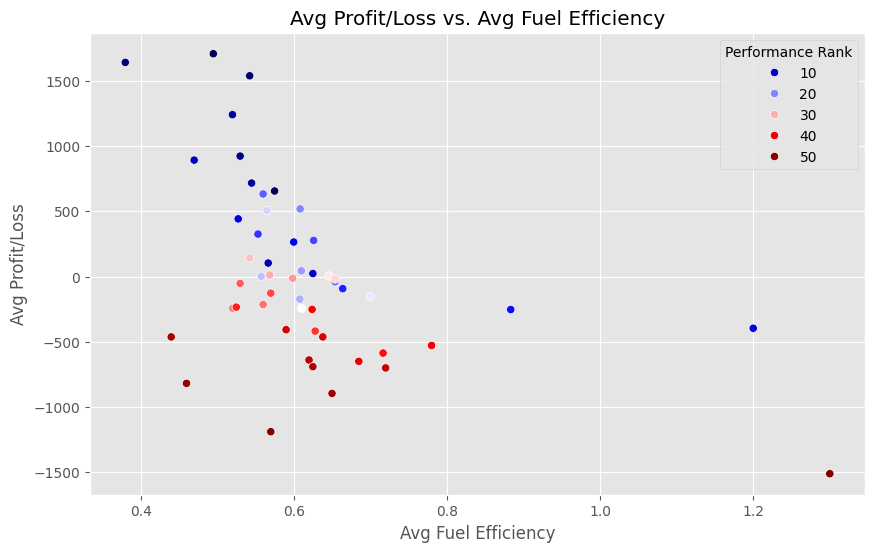

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg Fuel Efficiency', y='Avg Profit/Loss', data=df, hue='Performance Rank', palette='seismic')  # Scatter plot
plt.title('Avg Profit/Loss vs. Avg Fuel Efficiency')
plt.xlabel('Avg Fuel Efficiency')
plt.ylabel('Avg Profit/Loss')
plt.show()

Let's analyze the scatterplot "Avg Profit/Loss vs. Avg Fuel Efficiency" with the added dimension of "Performance Rank":

**Overall Trend and Relationship**

* **Negative Correlation:** The plot reveals a general negative correlation between "Avg Fuel Efficiency" and "Avg Profit/Loss". As fuel efficiency decreases (the greater the value, the higher the fuel consumption), average profit/loss tends to decrease. This suggests that vehicles with lower fuel efficiency are generally associated with lower profits or higher losses in this dataset.
* **Non-Linear Trend:** The scatter of points doesn't immediately suggest a strong linear relationship. The relationship might be better described as non-linear, potentially with a steeper negative slope at lower fuel efficiency values and a flatter slope at higher values.

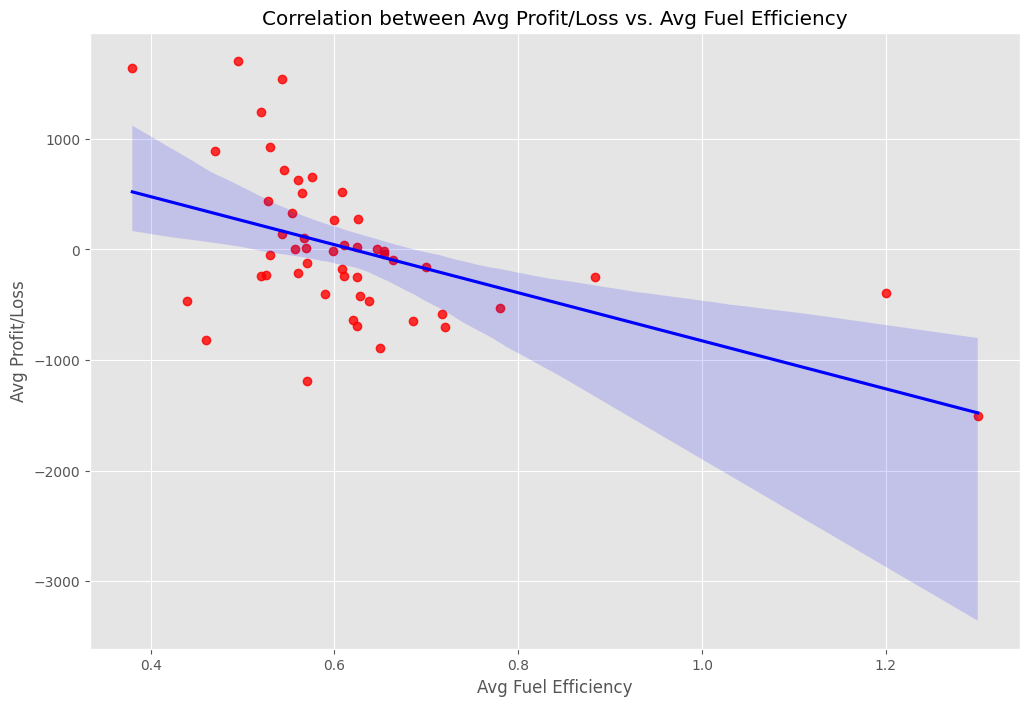

In [64]:
sns.regplot(x="Avg Fuel Efficiency", y="Avg Profit/Loss", data=df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Correlation between Avg Profit/Loss vs. Avg Fuel Efficiency')
plt.xlabel('Avg Fuel Efficiency')
plt.ylabel('Avg Profit/Loss')
plt.show()

**Criticisms of the Plot:**

* **Overwhelming Confidence Interval:** The confidence interval (shaded blue area) is very wide, especially at lower (the greater a value, the higher fuel consumption) fuel efficiency values, suggesting high uncertainty in the regression line's prediction.
* **Scatter and Weak Correlation:** The data points are scattered around the regression line, indicating a potentially weak correlation, and the plot doesn't quantify the relationship's strength.

**Let us consider alternative visualizations:** If the relationship is non-linear, let's explore a 'smoothed curve' plot type.


The function `sns.lmplot()` is used instead of `sns.regplot()` because it provides more flexibility for customizing the regression model.
When the parameter `lowess=True`, is set to True, it tells `sns.lmplot()` to use locally weighted scatterplot smoothing (LOWESS) to fit a non-parametric regression curve to the data. This results in a smoothed curve that captures the general trend without assuming a specific functional form (like linear).

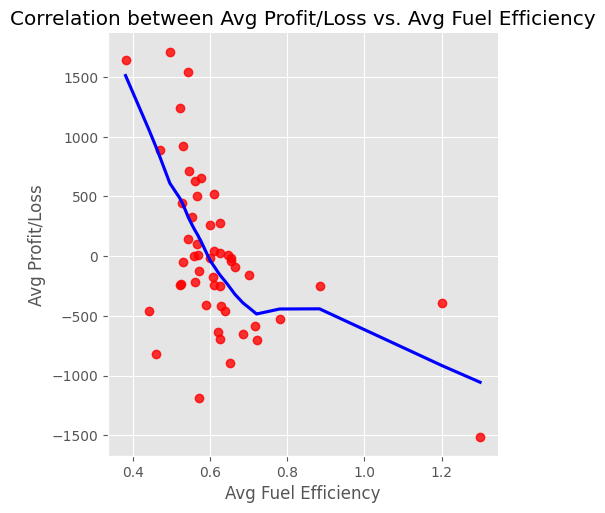

In [67]:
# Use sns.lmplot with lowess=True for smoothed curve
sns.lmplot(x="Avg Fuel Efficiency", y="Avg Profit/Loss", data=df, lowess=True, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Correlation between Avg Profit/Loss vs. Avg Fuel Efficiency')
plt.xlabel('Avg Fuel Efficiency')
plt.ylabel('Avg Profit/Loss')
plt.show()

## 8. Other Correlation Methods

There are different correlation methods. Above, we are using the default one, **Pearson**, but there's also **Kendall** and **Spearman**. These methods will all give us slightly different results, and Spearman gives significantly different results. 

### Kendall Method

In [71]:
# Compute the Kendall correlation matrix
correlation_matrix = df[correlation_cols].corr(method='kendall')

# Print the correlation matrix
print('===== Kendall Correlation Matrix ======')
print(correlation_matrix)

===== Kendall Correlation Matrix ======
                     Avg Gross  Total Gross  Avg Profit/Loss  \
Avg Gross             1.000000     0.499019         0.517850   
Total Gross           0.499019     1.000000         0.261176   
Avg Profit/Loss       0.517850     0.261176         1.000000   
Total Profit/Loss     0.475481     0.225098         0.847843   
Avg Miles             0.762652     0.416471         0.311373   
Total Miles           0.437819     0.901176         0.187451   
Avg Fuel Efficiency  -0.344476    -0.065252        -0.404875   
Avg Work Days         0.667186     0.414509         0.295156   
Performance Score     0.323264     0.151373         0.717647   

                     Total Profit/Loss  Avg Miles  Total Miles  \
Avg Gross                     0.475481   0.762652     0.437819   
Total Gross                   0.225098   0.416471     0.901176   
Avg Profit/Loss               0.847843   0.311373     0.187451   
Total Profit/Loss             1.000000   0.281569     0

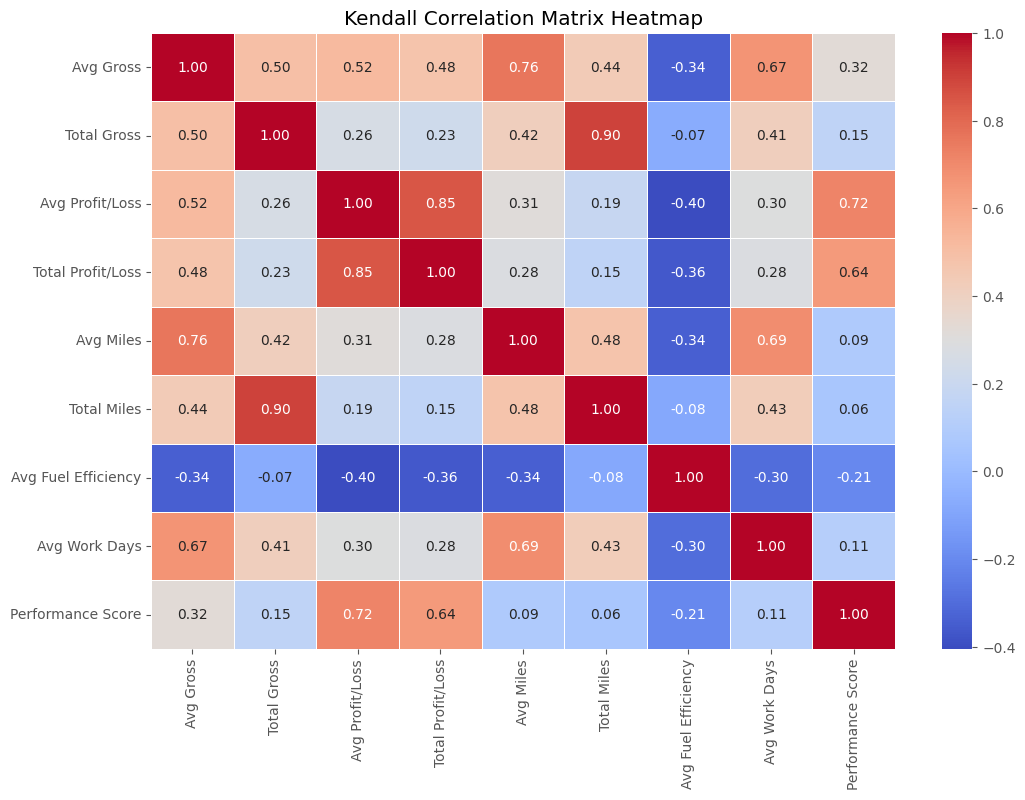

In [72]:
# Create a heatmap visualization
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Kendall Correlation Matrix Heatmap")

# Show the plot
plt.show()

Looking at the Kendall Correlation Matrix Heatmap:

1. **Highest correlations** are between:
   - Total Gross and Total Miles (0.90)
   - Average Profit/Loss and Total Profit/Loss (0.85)
   - Average Gross and Average Miles (0.76)
   - Average Profit/Loss and Performance Score (0.72)

2. The **Performance Score** is most strongly influenced by profitability metrics (0.72 with Avg Profit/Loss and 0.64 with Total Profit/Loss) rather than revenue or miles driven.

3. **Fuel Efficiency** maintains negative correlations with most metrics, but these correlations are weaker in the **Kendall** matrix than in the **Pearson** analysis shown previously, suggesting the relationships may be **nonlinear**.

4. **Average Miles** and **Average Work Days** show a strong positive correlation (0.69), confirming that more work days lead to more miles driven.

5. The correlation between revenue metrics and performance appears weaker in this **Kendall** analysis, with Total Gross showing only a 0.15 correlation with Performance Score.

This **Kendall** correlation analysis reveals that while distance driven strongly affects revenue, performance evaluation is more heavily weighted toward profitability measures rather than gross revenue or operational volume.

### Spearman Method

In [75]:
# Compute the Spearman correlation matrix
correlation_matrix = df[correlation_cols].corr(method='spearman')

# Print the correlation matrix
print('===== Spearman Correlation Matrix ======')
print(correlation_matrix)

===== Spearman Correlation Matrix ======
                     Avg Gross  Total Gross  Avg Profit/Loss  \
Avg Gross             1.000000     0.633363         0.685310   
Total Gross           0.633363     1.000000         0.371312   
Avg Profit/Loss       0.685310     0.371312         1.000000   
Total Profit/Loss     0.658431     0.345158         0.959367   
Avg Miles             0.901423     0.571041         0.419367   
Total Miles           0.598837     0.973213         0.271222   
Avg Fuel Efficiency  -0.490440    -0.084627        -0.528714   
Avg Work Days         0.827571     0.573560         0.391320   
Performance Score     0.442589     0.201267         0.874842   

                     Total Profit/Loss  Avg Miles  Total Miles  \
Avg Gross                     0.658431   0.901423     0.598837   
Total Gross                   0.345158   0.571041     0.973213   
Avg Profit/Loss               0.959367   0.419367     0.271222   
Total Profit/Loss             1.000000   0.402262     

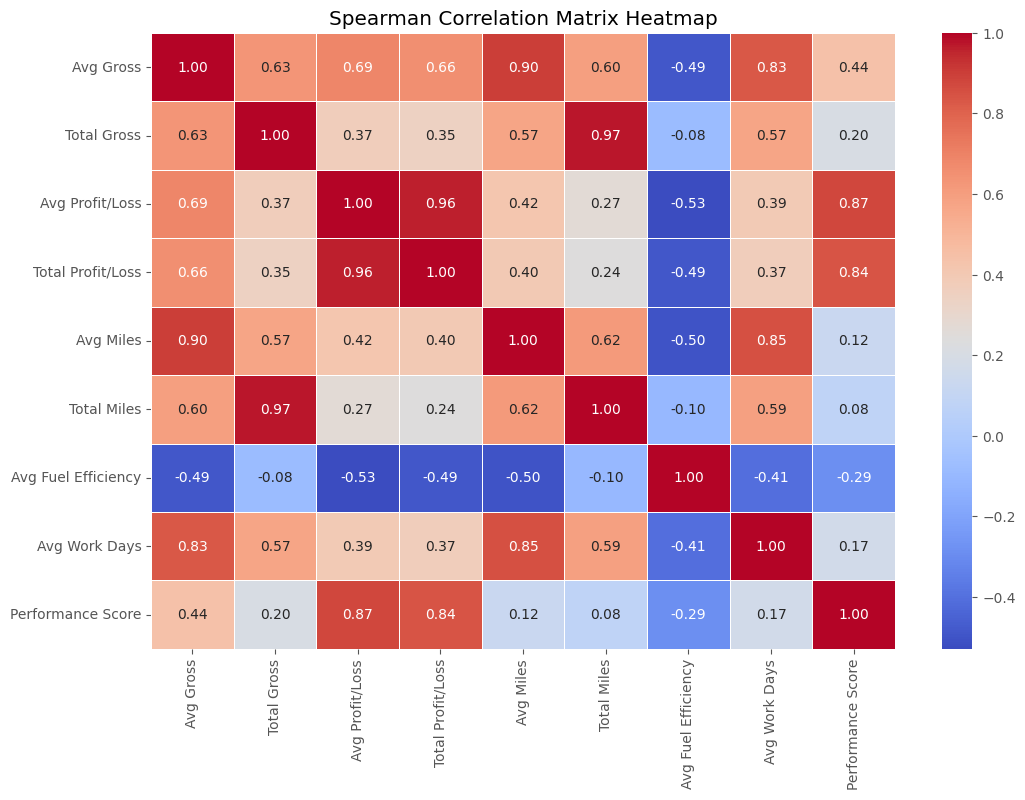

In [76]:
# Create a heatmap visualization
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Spearman Correlation Matrix Heatmap")

# Show the plot
plt.show()

Key insights become apparent when the three correlation analyses (Pearson, Kendall, and Spearman) are compared.

### Key Similarities Across All Methods

* **Strong relationship between miles and revenue is consistently shown across all three methods:**
    * Total Gross and Total Miles (Pearson: 0.99, Kendall: 0.90, Spearman: 0.97)
    * Avg Gross and Avg Miles (Pearson: 0.93, Kendall: 0.76, Spearman: 0.90)
* **Performance Score strongly correlates with profitability in all analyses:**
    * Avg Profit/Loss and Performance Score (Pearson: 0.86, Kendall: 0.72, Spearman: 0.87)
    * Total Profit/Loss and Performance Score (Pearson: 0.68, Kendall: 0.64, Spearman: 0.84)
* **Negative correlation between fuel efficiency and other metrics** appears in all three, though with varying strengths.

### Notable Differences

* **Pearson shows stronger correlations overall**, suggesting some relationships may be more linear than others.
* **Kendall correlations are generally lower than both Pearson and Spearman**, which is typical as Kendall uses a different calculation method that often yields more conservative estimates.
* **Spearman reveals stronger monotonic relationships than Kendall while being more robust to outliers than Pearson:**
    * Avg Profit/Loss and Total Profit/Loss (Spearman: 0.96 vs. Kendall: 0.85)
    * Avg Miles and Avg Work Days (Spearman: 0.85 vs. Kendall: 0.69)
* **Fuel efficiency correlations vary significantly:**
    * With Avg Gross: Pearson (-0.62) shows stronger negative correlation than Spearman (-0.49) or Kendall (-0.34)
    * With Total Gross: Pearson (-0.28) shows stronger negative correlation than Spearman (-0.08) or Kendall (-0.07)

### Analytical Implications

* **The consistency across methods** for key relationships (miles-revenue, profit-performance) confirms these are robust findings regardless of statistical approach.
* **The differences in correlation strength between methods** suggest some relationships are not perfectly linear, making Spearman and Kendall valuable for capturing more complex associations.
* **The Spearman** results appear to balance the sensitivity of Pearson with the robustness of Kendall, providing a middle ground that captures important relationships while being less affected by potential outliers.

| **How to Chose the Best Correlation Method** | | |
|------------------------------------------|--------------|--------------------------------------------------|
| **Method** | **Suitable for this dataset?** | **Reason** |
| **Pearson** | ❌ No | Assumes a linear relationship and normally distributed data, which may not be valid for small datasets. |
| **Spearman** | ✅ Yes | Measures monotonic relationships, handles small datasets and is robust to outliers. |
| **Kendall** | ✅ Yes | Works well for ordinal data (e.g., Performance Rank), and small datasets, and handles ties better than Spearman. |

Since **Performance Rank is an ordinal variable**, **Kendall** would be the best choice. However, if we want a broader look at monotonic relationships, **Spearman** is also a good choice.

_This multi-method approach provides a more complete picture of the data relationships, confirming the core business dynamics while highlighting nuances that might be missed by using only one correlation method._

### Unstacking Variables

To quickly view the highest correlations, we'll use 'unstacking'.
When unstacked, it shows each item and what it's compared to. For example, under 'Total Miles' we see its correlation to 'Avg Miles', 'Total Profit/Loss', and 'Avg Profit/Loss'.
To make it even faster, we can pair everything up using `sorted_pairs = correlation_pairs.sort_values()`.
This is similar to the matrix but in a linear format.

In [103]:
# Factorize categorical variables and compute the correlation
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='spearman')

# Unstack the matrix to create pairs
corr_pairs = correlation_mat.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate correlation pairs by keeping only one instance
corr_pairs = corr_pairs.groupby(lambda x: tuple(sorted(x))).first()

# Sort correlations by absolute value (optional)
corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# Print the cleaned correlation pairs
print(corr_pairs)


(Avg Miles, Avg Profit/Loss)            1.000000
(Total Gross, Total Profit/Loss)        1.000000
(Performance Rank, Total Gross)         1.000000
(Avg Miles, Performance Rank)           1.000000
(Avg Miles, Performance Score)          1.000000
                                          ...   
(Avg Work Days, Total Profit/Loss)      0.263801
(Avg Driver Pay, Avg Work Days)         0.263801
(Avg Gross, Avg Work Days)              0.254134
(Avg Fuel Efficiency, Avg Work Days)    0.233293
(Avg Work Days, Driver ID)              0.176546
Length: 91, dtype: float64


### Insights from the "unstacking":

1. **Perfect Correlations (1.000000)**
   - `Avg Miles` and `Avg Profit/Loss`: Suggests that the number of miles driven directly affects profit/loss.
   - `Total Gross` and `Total Profit/Loss`: Indicates that gross earnings and profit/loss are highly interdependent.
   - `Performance Rank` and `Total Gross`: Implies that performance ranking is tied closely to gross earnings.
   - `Avg Miles` with both `Performance Rank` and `Performance Score`: More miles driven correlates perfectly with better performance metrics.

2. **Moderate Correlations (0.25 - 0.27)**
   - `Avg Work Days` and `Total Profit/Loss` (0.263): More workdays slightly increase profitability.
   - `Avg Driver Pay` and `Avg Work Days` (0.263): Drivers who work more days tend to have slightly higher pay.
   - `Avg Gross` and `Avg Work Days` (0.254): Suggests a small but positive link between the number of workdays and gross income.
   - `Avg Fuel Efficiency` and `Avg Work Days` (0.233): Indicates that fuel efficiency has a weak relationship with workdays.

3. **Weaker Correlations (Below 0.20)**
   - `Avg Work Days` and `Driver ID` (0.176): This suggests minimal variation in workdays among drivers, but there could be differences in scheduling or availability.

### **Key Takeaways:**
- **Driver Performance & Miles:** Driving more miles directly impacts performance ranking and profitability.
- **Work Days & Earnings:** More workdays slightly boost total earnings and driver pay but not dramatically.
- **Fuel Efficiency Impact:** Weak correlation with workdays suggests fuel efficiency is not heavily dependent on work schedule.


We can now take a look at the ones that have a high correlation (> 0.75) and dropping duplicate correlation pairs.

In [133]:
# Factorize categorical variables and compute the correlation
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='spearman')

# Unstack the matrix to create pairs
corr_pairs = correlation_mat.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate correlation pairs by keeping only one instance
corr_pairs = corr_pairs.groupby(lambda x: tuple(sorted(x))).first()

# Sort correlations by absolute value (optional)
corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# strong_pairs = corr_pairs.abs().sort_values()[abs(sorted_pairs) > 0.75, abs(sorted_pairs) < 1.0]
strong_pairs = corr_pairs[(corr_pairs > 0.75) & (corr_pairs < 1.0)]

# Print the cleaned correlation pairs
print(strong_pairs)


(Avg Driver Pay, Avg Gross)                 0.996357
(Avg Gross, Avg Profit/Loss)                0.996357
(Avg Gross, Avg Miles)                      0.996357
(Avg Gross, Total Profit/Loss)              0.996357
(Avg Gross, Total Miles)                    0.996357
(Avg Gross, Total Gross)                    0.996357
(Avg Gross, Total Driver Pay)               0.996357
(Avg Gross, Performance Score)              0.996357
(Avg Gross, Performance Rank)               0.996357
(Avg Miles, Driver ID)                      0.843301
(Driver ID, Total Profit/Loss)              0.843301
(Driver ID, Total Gross)                    0.843301
(Driver ID, Total Driver Pay)               0.843301
(Driver ID, Performance Score)              0.843301
(Driver ID, Performance Rank)               0.843301
(Avg Driver Pay, Driver ID)                 0.843301
(Avg Profit/Loss, Driver ID)                0.843301
(Driver ID, Total Miles)                    0.843301
(Avg Fuel Efficiency, Avg Profit/Loss)      0.

#### **Insights from the Strong Correlations (0.5 < r < 1.0)**  

1. **Highly Correlated Financial Metrics (r ≈ 0.996)**  
   - `Avg Driver Pay` is almost perfectly correlated with `Avg Gross`, meaning that gross earnings directly determine driver pay.  
   - `Avg Gross` has extremely high correlations with `Avg Profit/Loss`, `Total Profit/Loss`, `Total Miles`, `Total Gross`, and `Total Driver Pay`.  
   - **Key Takeaway:** Gross income is the central driver for profit and driver pay.  

2. **Driver ID and Performance Metrics (r ≈ 0.843)**  
   - `Driver ID` correlates strongly with `Total Profit/Loss`, `Total Gross`, `Total Driver Pay`, and performance scores.  
   - **Implication:** This suggests that certain drivers consistently perform better, possibly due to experience, routes, or work habits.  

3. **Fuel Efficiency and Profitability (r ≈ 0.842)**  
   - `Avg Fuel Efficiency` strongly correlates with `Avg Profit/Loss`, `Performance Rank`, and `Performance Score`.  
   - **Insight:** Fuel-efficient drivers tend to be more profitable and perform better. This could be due to better driving habits, optimized routes, or vehicle type.  

4. **Miles Driven and Financial Outcomes (r ≈ 0.842-0.996)**  
   - `Avg Miles` has a strong correlation with `Total Profit/Loss`, `Total Miles`, `Total Gross`, and `Avg Fuel Efficiency`.  
   - **Key Takeaway:** More miles driven generally leads to higher earnings, but efficiency still plays a role.  

### **Actionable Steps:**  
- **Identify high-performing drivers** based on `Driver ID` correlations and analyze their behaviors.  
- **Optimize fuel efficiency** since it contributes to profitability.  
- **Analyze diminishing returns on miles driven**—at what point do additional miles stop adding significant profit?  

####  ___________________________________________________________________________________________________________

### **10. Summary and Conclusion**  

#### **Key Findings and Strategic Business Implications**  

- **Driver Performance & Mileage:** Higher mileage directly influences performance rankings and profitability.  
- **Workdays & Earnings:** Increasing workdays slightly boosts total earnings and driver pay.  
- **Fuel Efficiency Impact:** Fuel efficiency remains largely independent of the number of workdays.  
- **Business Model Focus:** The correlation matrix indicates that the current strategy prioritizes maximizing operational days and miles driven to optimize revenue.  
- **Performance Evaluation:** Profitability has a strong correlation with performance scores (0.86), whereas total revenue has a weaker correlation (0.26). This suggests that management values operational efficiency over sheer revenue volume.  

#### **Recommendations and Actionable Strategies**  

To enhance both efficiency and profitability, the following strategies could be considered:  

1. **Optimizing Route Efficiency** – Instead of focusing solely on mileage, improving route planning could enhance productivity and reduce unnecessary fuel consumption.  
2. **Investigating Fuel Efficiency Trends** – Identifying why fuel efficiency fluctuates over extended work periods may help improve operational sustainability.  
3. **Refining Performance Metrics** – Revising current evaluation criteria to incentivize balanced and sustainable operational practices.  
4. **Exploring Work Patterns and Revenue Relationships** – A deeper analysis of how work schedules impact revenue generation and efficiency.  
5. **Driver Behavior Analysis** – Studying high-performing drivers using correlation insights to uncover best practices.  
6. **Assessing Mileage Profitability Thresholds** – Identifying the point at which additional miles cease to generate substantial profit increases.  

#### **Further Analysis and Future Considerations**  

- **Potential for Increased Profits:** While higher mileage generally leads to greater revenue, fuel efficiency, maintenance costs, and operational expenses must be factored into profitability calculations.  
- **Outlier Investigation:** Examining outliers in the dataset can provide insights into unique driver behaviors or operational factors affecting financial outcomes.  
- **Regression Analysis:** Conducting a regression analysis to quantify the impact of mileage on profit/loss and assess statistical significance.  
- **Other Contributing Factors:** Analyzing additional influences such as driver experience, route types, and fuel efficiency on overall profitability.  

### **Final Thoughts**  

While increasing mileage may drive higher profits, a data-driven, holistic approach that considers fuel efficiency, maintenance costs, and operational expenses is critical for long-term sustainability. Given the strong correlation between performance scores and profitability, refining business operations to balance efficiency and revenue generation can yield substantial long-term benefits.